In [42]:
import pandas as pd
import numpy as np

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
pd.set_option('display.max_columns', None)

In [71]:
df.to_csv('C:\\Users\\zoeyz\\Downloads\\selected_col_v2.csv')

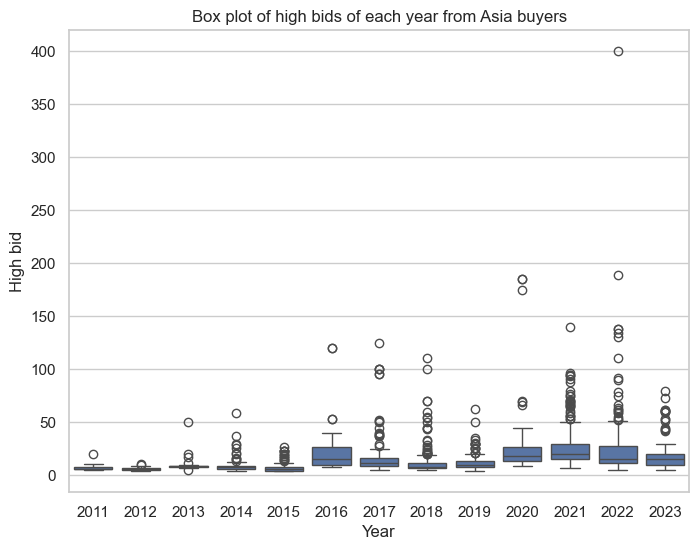

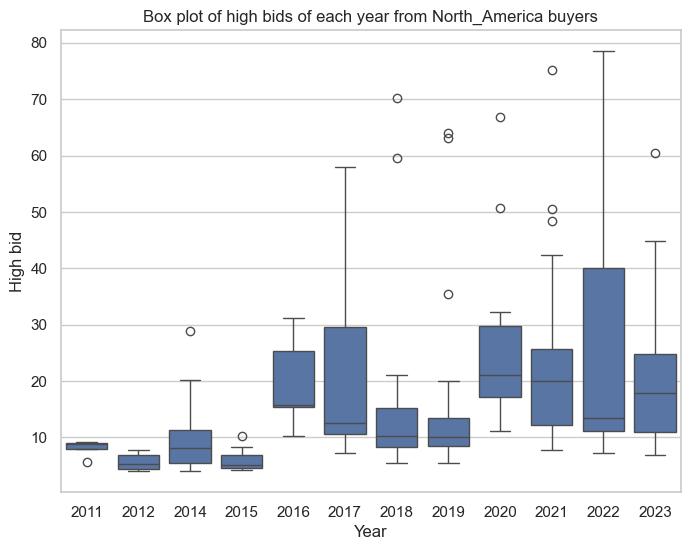

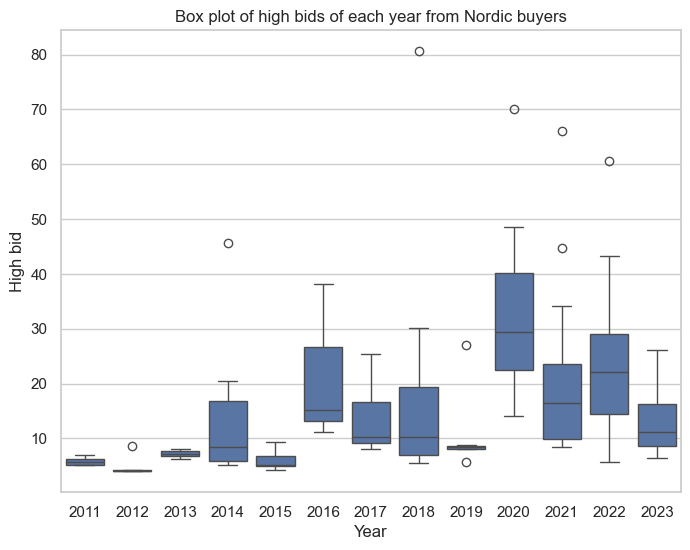

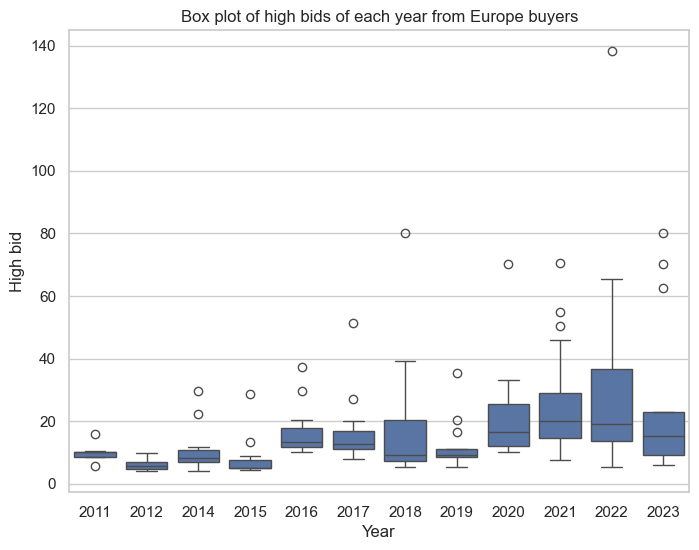

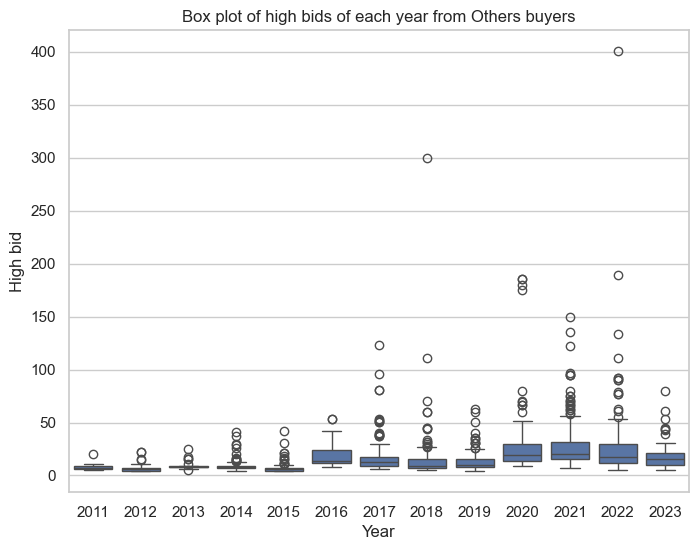

In [84]:
buyer_list = ['Asia','North_America','Nordic','Europe','Others']
for b in buyer_list:
    df_b = df[df[b]==1]
    plt.figure(figsize=(8, 6))
    sns.set(style="whitegrid")
    ax = sns.boxplot(x="Year", y="High_bid", data=df_b)
    ax.set_title("Box plot of high bids of each year from " + b + " buyers")
    ax.set_xlabel("Year")
    ax.set_ylabel("High bid")
    # plt.savefig('boxplot_' + b + '.png')
    plt.show()

<Figure size 1000x600 with 0 Axes>

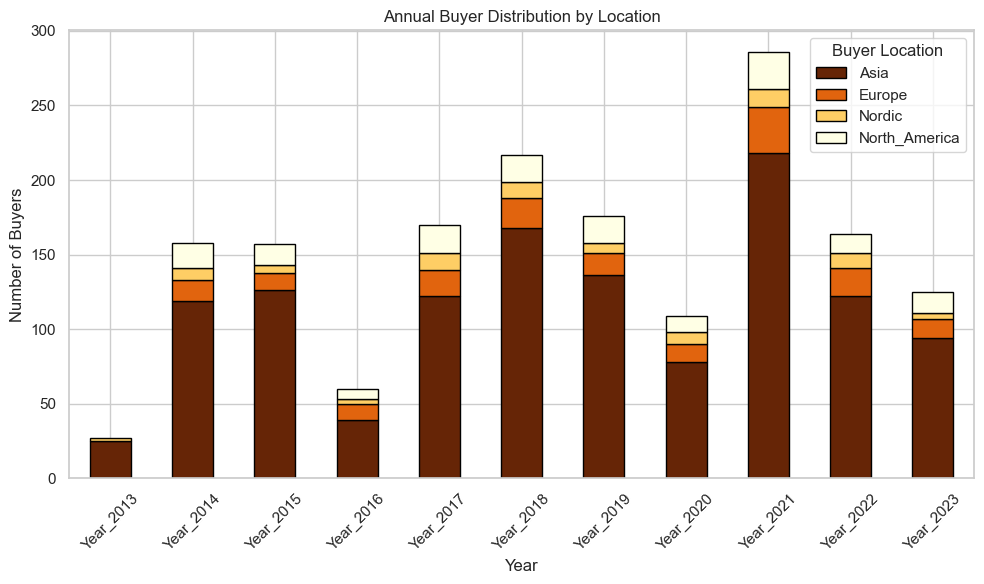

In [115]:
# Preparing the data for stacked bar plot
# Filtering out the columns related to years and locations
year_columns = [col for col in df.columns if col.startswith('Year_')]
by_columns = ['Asia', 'North_America', 'Nordic', 'Europe']
year_region_data = df[year_columns + by_columns]

# Creating a summary dataframe for plotting
summary_df = pd.DataFrame()

for year in year_columns:
    temp_df = year_region_data[year_region_data[year] == 1][by_columns].sum().reset_index()
    temp_df.columns = ['Buyer Location', 'Count']
    temp_df['Year'] = year
    summary_df = pd.concat([summary_df, temp_df])

# Reshaping the dataframe for seaborn
summary_df = summary_df.pivot(index='Year', columns='Buyer Location', values='Count').fillna(0)

# Creating a stacked bar plot
plt.figure(figsize=(10, 6))
summary_df.plot(kind='bar', stacked=True, colormap='YlOrBr_r', edgecolor='Black', figsize=(10, 6))
plt.title('Annual Buyer Distribution by Location')
plt.xlabel('Year')
plt.ylabel('Number of Buyers')
plt.xticks(rotation=45)
plt.legend(title='Buyer Location')
plt.tight_layout()

# Show the plot
plt.show()

In [116]:
summary_df

Buyer Location,Asia,Europe,Nordic,North_America
Year,,,,
Year_2013,25.0,0.0,2.0,0.0
Year_2014,119.0,14.0,8.0,17.0
Year_2015,126.0,12.0,5.0,14.0
Year_2016,39.0,11.0,3.0,7.0
Year_2017,122.0,18.0,11.0,19.0
Year_2018,168.0,20.0,11.0,18.0
Year_2019,136.0,15.0,7.0,18.0
Year_2020,78.0,12.0,8.0,11.0
Year_2021,218.0,31.0,12.0,25.0


<Figure size 1000x600 with 0 Axes>

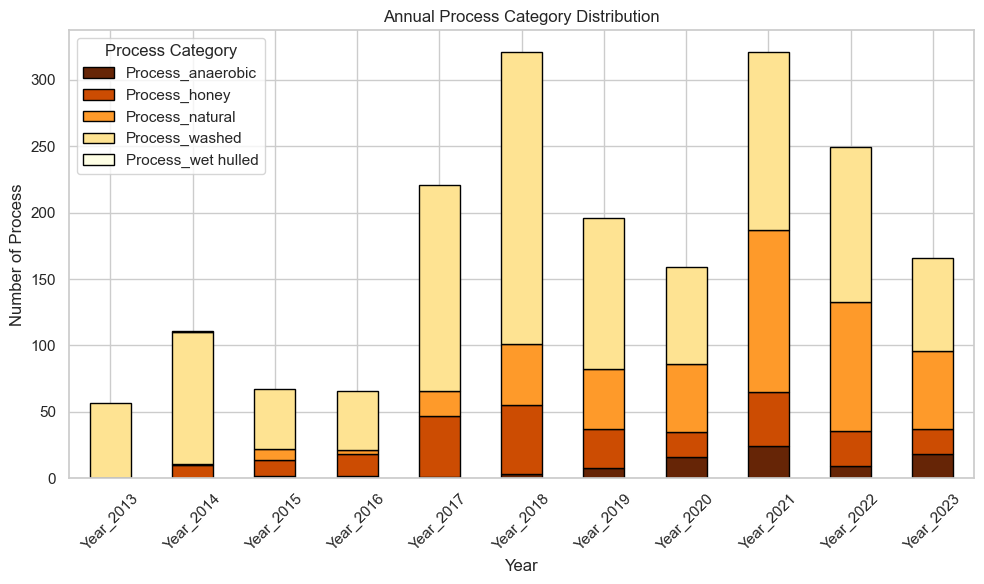

In [113]:
# Preparing the data for stacked bar plot
# Filtering out the columns related to years and regions
year_columns = [col for col in df.columns if col.startswith('Year_')]
p_columns = [col for col in df.columns if col.startswith('Process_')]
year_region_data = df[year_columns + p_columns]

# Creating a summary dataframe for plotting
summary_df = pd.DataFrame()

for year in year_columns:
    temp_df = year_region_data[year_region_data[year] == 1][p_columns].sum().reset_index()
    temp_df.columns = ['Process Category', 'Count']
    temp_df['Year'] = year
    summary_df = pd.concat([summary_df, temp_df])

# Reshaping the dataframe for seaborn
summary_df = summary_df.pivot(index='Year', columns='Process Category', values='Count').fillna(0)

# Creating a stacked bar plot
plt.figure(figsize=(10, 6))
summary_df.plot(kind='bar', stacked=True, colormap='YlOrBr_r', edgecolor='Black', figsize=(10, 6))
plt.title('Annual Process Category Distribution')
plt.xlabel('Year')
plt.ylabel('Number of Process')
plt.xticks(rotation=45)
plt.legend(title='Process Category')
plt.tight_layout()

# Show the plot
plt.show()

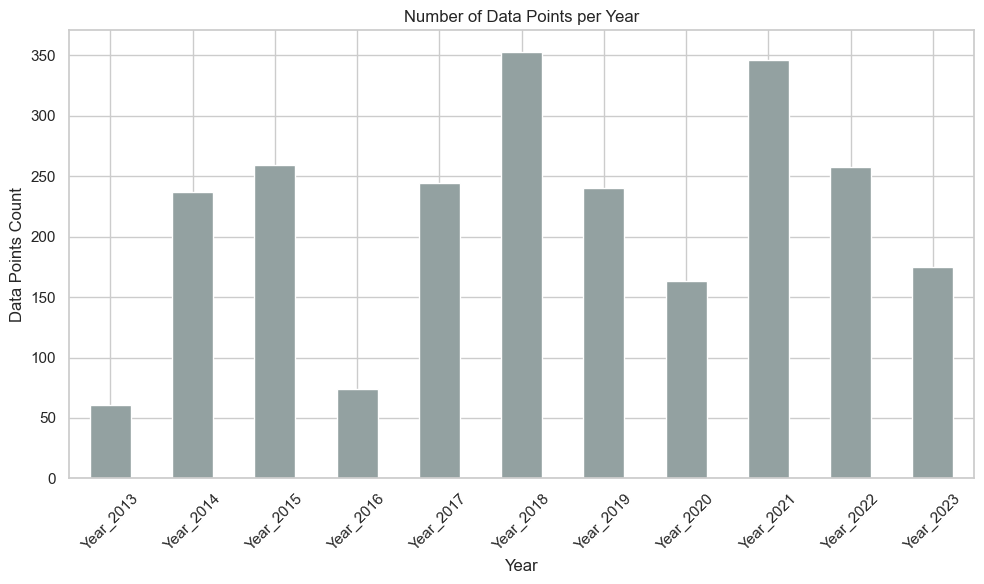

In [138]:
data_points_per_year = df[year_columns].sum()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
data_points_per_year.plot(kind='bar', color='#93a1a1')
plt.title('Number of Data Points per Year')
plt.xlabel('Year')
plt.ylabel('Data Points Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()